# 평가

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR

## 회귀

In [4]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
print(f"학습 : {model.score(X_train, y_train)}")
print(f"예측 : {model.score(X_test, y_test)}")

학습 : 0.7175245699007546
예측 : 0.6676893373552526


In [7]:
# 예측
predict = model.predict(X_test)


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f"mean_absolute_error : {mean_absolute_error(y_test, predict)}")
print(f"mean_squared_error : {mean_squared_error(y_test, predict)}")
# RMSE
print(f"root_mean_squared_error : {np.sqrt(mean_squared_error(y_test, predict))}")

mean_absolute_error : 3.688600589899893
mean_squared_error : 33.5897759383444
root_mean_squared_error : 5.795668722273937


## 회귀

In [14]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC(kernel = 'linear', probability = True)
model.fit(X_train, y_train)

# 예측
predict = model.predict(X_test)

accuracy_score : 0.951048951048951
[[47  6]
 [ 1 89]]
precision_score : 0.9368421052631579
recall_score : 0.9888888888888889
f1_score : 0.9621621621621621
roc_auc_score : 0.9378406708595388


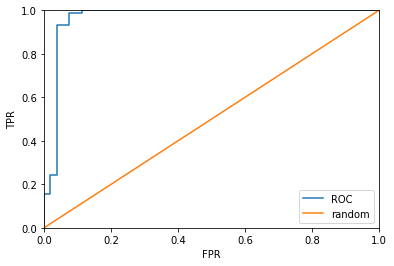

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# 1. 정확도
print(f"accuracy_score : {accuracy_score(y_test, predict)}")

# 2. 오차 행렬 (사용 주의!)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predict)
print(conf_matrix)

# 3. 정밀도와 재현율
print(f"precision_score : {precision_score(y_test, predict)}")
print(f"recall_score : {recall_score(y_test, predict)}")

# 4. F1-score
print(f"f1_score : {f1_score(y_test, predict)}")

# 5. ROC/AUC
print(f"roc_auc_score : {roc_auc_score(y_test, predict)}")

import matplotlib.pyplot as plt

# 분류가 1인 것들 모음
pred_proba_class1 = model.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 시각화
plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0, 1], [0, 1], label = 'random')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()